In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

#import data files
path = r'/Users/amritambe/Desktop/CareerF Python/Insta Cart Analysis'
df_full = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Df_Cust_Profs.pkl'))
df_full.shape, df_full.describe()


((30992664, 47),
            order_id   customer_id  customer_order_number  orders_day_of_week  \
 count  3.099266e+07  3.099266e+07           3.099266e+07        3.099266e+07   
 mean   1.710321e+06  1.029285e+05           1.783372e+01        2.741342e+00   
 std    9.873797e+05  5.947097e+04           1.763399e+01        2.089226e+00   
 min    2.000000e+00  1.000000e+00           1.000000e+00        0.000000e+00   
 25%    8.554110e+05  5.140900e+04           5.000000e+00        1.000000e+00   
 50%    1.710404e+06  1.025850e+05           1.200000e+01        3.000000e+00   
 75%    2.565216e+06  1.543880e+05           2.500000e+01        5.000000e+00   
 max    3.421083e+06  2.062090e+05           9.900000e+01        6.000000e+00   
 
        order_hour_of_day  days_between_last_order    product_id  \
 count       3.099266e+07               29329778.0  3.099266e+07   
 mean        1.341082e+01                      NaN  2.557757e+04   
 std         4.248811e+00                      0

In [2]:
# create mapping df
df_full.columns.tolist()

['order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'Dependents',
 'Marital_Status',
 'Income',
 'Region',
 'weekend_ratio',
 'weekend_customer',
 'age_group',
 'income_brackets',
 'top_one_percent',
 'top_ten_percent',
 'Children',
 'Nightowl_Orders',
 'Nightowl_Ratio',
 'Nightowl_Customer',
 'index',
 'department_names',
 'income_brackets_2',
 'total_expenditure',
 'customer_profile']

In [3]:
map_reg = df_full[['State', 'Region']].drop_duplicates()
map_reg.shape, map_reg.head(10)

((51, 2),
             State     Region
 0         Alabama      South
 59        Indiana    Midwest
 131     Louisiana      South
 335       Montana       West
 540      Oklahoma      South
 839     Tennessee      South
 1155         Iowa    Midwest
 1236         Ohio    Midwest
 1394     Virginia      South
 1444  Connecticut  Northeast)

In [4]:
#export map_reg as csv for tableau  mapping
#map_reg.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Region_Mapping.csv'))

In [5]:
#import customer_region.csv
#cust_reg = pd.read_csv(os.path.join(path, '02 Data', 'customer_region.csv'))

In [6]:
cust_reg['count'].sum()

30992664

In [7]:
df_full['customer_id'].nunique()

162633

In [8]:
df_full[['Customer_Spend', 'total_expenditure']].head(10)

,Customer_Spend,total_expenditure
0,Low Spender,375.68457
1,Low Spender,375.68457
2,Low Spender,375.68457
3,Low Spender,375.68457
4,Low Spender,375.68457
5,Low Spender,375.68457
6,Low Spender,375.68457
7,Low Spender,375.68457
8,Low Spender,375.68457
9,Low Spender,375.68457


In [9]:
cust_reg2 = df_full[['customer_id', 'customer_profile', 'Gender', 'State', 'Region', 'income_brackets_2', 'total_expenditure']].drop_duplicates()
cust_reg2.shape

(162633, 7)

In [10]:
cust_reg2.head(15)

,customer_id,customer_profile,Gender,State,Region,income_brackets_2,total_expenditure
0,1,Midlife Married With Kids,Female,Alabama,South,very_low,375.684570
59,15,Elder Single No Kids,Female,Indiana,Midwest,very_low,286.582031
131,19,Elder Married With Kids,Female,Louisiana,South,very_high,1707.891602
335,21,Elder Single No Kids,Male,Montana,West,high,1437.570312
540,31,Midlife Married With Kids,Female,Oklahoma,South,very_low,2433.192383
839,43,Midlife Married With Kids,Female,Tennessee,South,high,1094.412109
986,52,Elder Married With Kids,Female,Alabama,South,very_low,1083.094727
1155,67,Elder Married With Kids,Female,Iowa,Midwest,high,620.179688
1236,81,Midlife Married With Kids,Male,Ohio,Midwest,high,223.070312
1263,82,Midlife Married With Kids,Male,Oklahoma,South,very_low,843.732422


In [11]:
#export csv
#cust_reg2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'customer_regions_full.csv'))

In [12]:
#check
cust_reg2['total_expenditure'].agg('mean')

1485.2790577257824

# Top Department

In [13]:
#find top department for each customer_id

# Group by 'customer_id' and 'department_names', calculate the sum, and reset the index
top_departments = df_full.groupby(['customer_id', 'department_names'])['prices'].sum().reset_index()

# Find the index of the maximum 'prices' value within each 'customer_id' group
idx = top_departments.groupby('customer_id')['prices'].idxmax()

# Get the corresponding rows from the 'top_departments' DataFrame
top_dept = top_departments.loc[idx]
top_dept.shape

(162633, 3)

In [14]:
top_dept

,customer_id,department_names,prices
0,1,beverages,130.195312
11,2,dairy eggs,474.906250
27,3,produce,283.508789
31,4,beverages,30.000000
48,7,produce,449.761719
...,...,...,...
1882172,206203,produce,273.586914
1882181,206206,frozen,766.226562
1882202,206207,produce,403.640625
1882219,206208,produce,1569.223633


In [15]:
#export top departments to compare with tableau
#top_dept.to_csv(os.path.join(path, '02 Data', 'top_dept2.csv'))

In [17]:
#merge with cust_reg2 on customer_id

#cust_reg_dept = pd.merge(cust_reg2, top_departments, 

In [18]:
df_full.shape

(30992664, 47)

In [19]:
df_full.isnull().sum()

order_id                         0
customer_id                      0
customer_order_number            0
orders_day_of_week               0
order_hour_of_day                0
days_between_last_order    1662886
first_order                      0
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                 26972
aisle_id                         0
department_id                    0
prices                        4877
_merge                           0
price_range_loc                  0
Busiest Days                     0
busiest_hours_of_day             0
max_orders                       0
loyalty_flag                     0
avg_cust_spend                   0
Customer_Spend                   0
median_order_frequency           0
Order_Frequency                  0
Gender                           0
State                            0
Age                              0
date_joined                      0
Dependents          

In [20]:
df_full['first_order'].value_counts()

False    29329778
True      1662886
Name: first_order, dtype: int64

# compare customer_profiles, regions, and departments by sum of prices column

In [ ]:
#group by columns
cust_rd = df_full.groupby(['customer_profile', 'Region', 'department_names'])['prices'].sum().reset_index()

#calculate sum of prices within grouped df, reset index
#data = grouped_data['prices'].sum().reset_index()

In [23]:
#check
cust_rd.sort_values(by='prices', ascending=False, inplace=True)
cust_rd.head(20)

,customer_profile,Region,department_names,prices
229,Midlife Married With Kids,South,produce,8.827771e+06
250,Midlife Married With Kids,West,produce,6.658471e+06
187,Midlife Married With Kids,Midwest,produce,6.213124e+06
61,Elder Married With Kids,South,produce,5.870540e+06
217,Midlife Married With Kids,South,dairy eggs,5.196143e+06
208,Midlife Married With Kids,Northeast,produce,4.671703e+06
82,Elder Married With Kids,West,produce,4.588953e+06
19,Elder Married With Kids,Midwest,produce,4.161228e+06
238,Midlife Married With Kids,West,dairy eggs,4.036619e+06
175,Midlife Married With Kids,Midwest,dairy eggs,3.709922e+06


In [24]:
#check if all revenue is in cust_rd
print(df_full['prices'].sum() - cust_rd['prices'].sum())

0.0


# export to csv to chart in tableau

In [25]:
cust_rd.to_csv(os.path.join(path, '02 Data', '20231003_IC_profanalysis_v1.csv'))

In [26]:
df_full['prices'].sum()

241555388.9951172

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal Customer'),
  Text(1, 0, 'New Customer'),
  Text(2, 0, 'Regular Customer')])

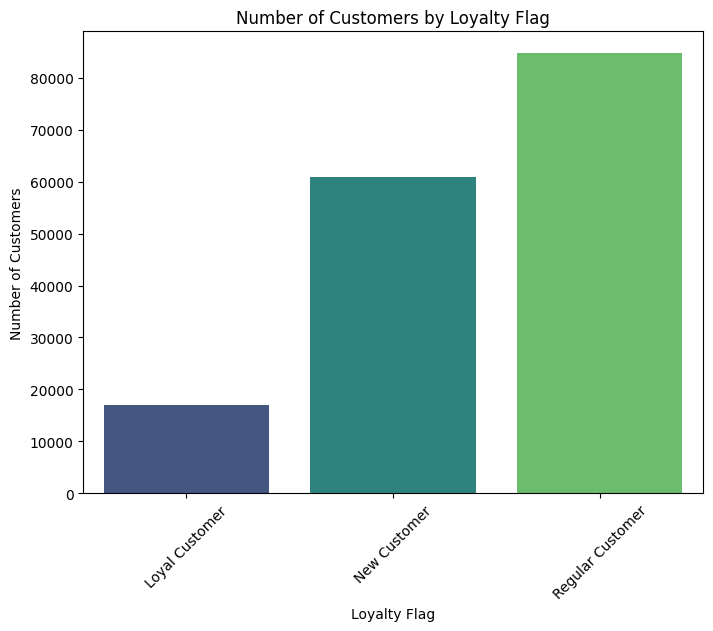

In [52]:
#chart # of customers by loyalty flag
loyal = df_full[['customer_id', 'loyalty_flag']]
loyal = loyal.drop_duplicates()
loyal_counts = loyal.groupby('loyalty_flag')['customer_id'].count().reset_index()
# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
lb = sns.barplot(data=loyal_counts, x='loyalty_flag', y='customer_id', palette='viridis')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Loyalty Flag')
plt.xticks(rotation=45)


In [53]:
#export
lb.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer_Count_Loyalty.png'))

Text(0.5, 1.0, 'Revenue by Age Group')

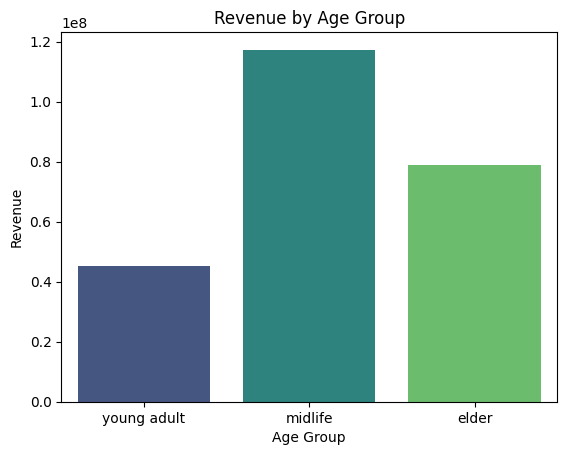

In [38]:
#bar chart for age groups
age = df_full.groupby('age_group')['prices'].sum().reset_index()

age_bar = sns.barplot(data=age, x='age_group', y='prices', palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Revenue')
plt.title('Revenue by Age Group')


In [39]:
#export
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Rev_by_Age_Group.png'))

Text(0.5, 1.0, 'Revenue by Income Bracket')

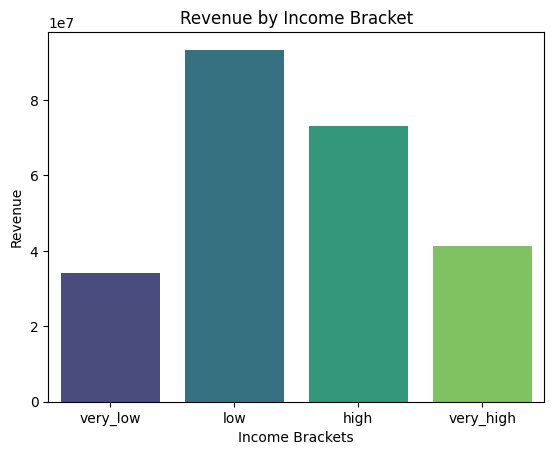

In [41]:
#bar chart for income groups
age = df_full.groupby('income_brackets_2')['prices'].sum().reset_index()

inc_bar = sns.barplot(data=age, x='income_brackets_2', y='prices', palette='viridis')
plt.xlabel('Income Brackets')
plt.ylabel('Revenue')
plt.title('Revenue by Income Bracket')


In [42]:
#export
inc_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Revenue_by_Income_Bracket.png'))

Text(0.5, 1.0, 'Income Distribution Histogram')

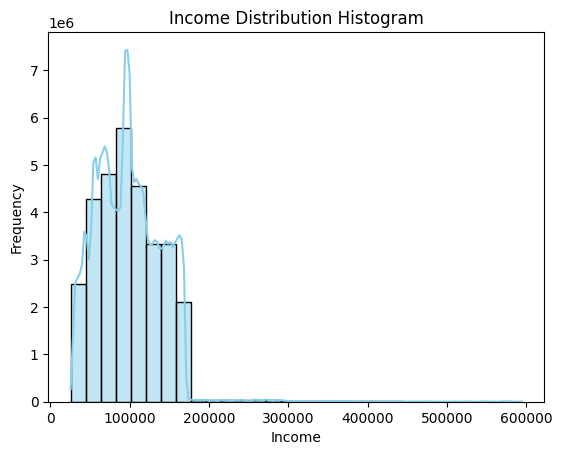

In [43]:
#Income Histogram, with labeled axis
inc_hist = df_full['Income']

histo = sns.histplot(data=inc_hist, bins=30, kde=True, color='skyblue')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution Histogram')


In [44]:
#export
histo.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_Histogram2.png'))

Text(0.5, 0, 'Loyalty Group')

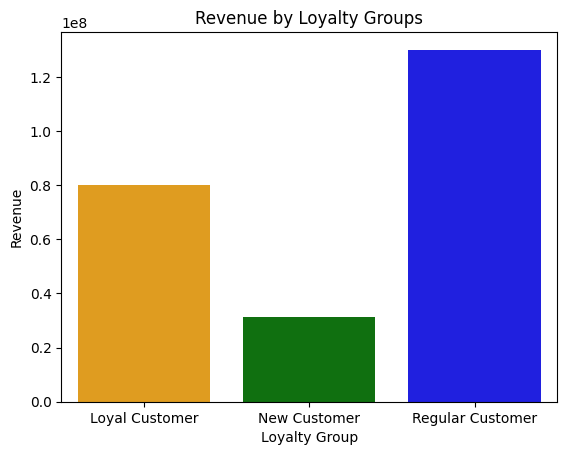

In [60]:
# loyalty flag and revenue
lr = df_full.groupby('loyalty_flag')['prices'].sum().reset_index()
#bar plot
custom_palette = {'Loyal Customer': 'orange', 'Regular Customer': 'blue', 'New Customer': 'green'}

lrb = sns.barplot(data=lr, x='loyalty_flag', y='prices', palette=custom_palette)


#title
plt.title('Revenue by Loyalty Groups')
plt.ylabel('Revenue')
plt.xlabel('Loyalty Group')


In [61]:
#export
lrb.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_Revenue.png'))